# Random Forest


 این پروژه برای تشخیص سبک موسیقی از روی داده‌های صوتی طراحی شده . هدف  کمک به شناسایی سبک موسیقی در حال پخش هست، که در توسعه‌ی برنامه‌هایی مانند اسپاتیفای یا سایر اپلیکیشن‌های مرتبط با موسیقی بسیار کاربردی هستش.

This project is designed to identify the musical genre based on audio data, helping detect the style of music being performed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



فایل رو صدا میزنیم حتما فایل باید در مسیر پروژتون باشه


We call the file. The file must be in your project path.



Data Cleaning

به دلیل اینکه داخل ستون اول مقادیر عدد با استرینگ قاطی شده بود من از اکسل اون رو دستی پاک کردم و ستون رو درست کردم که برای یادیگیری امده باشه و ارور نده.


Because the first column contained both numeric and string values, I manually removed them and fixed the column so it can be used for learning and won’t cause any errors.


دیتا از:
https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data
~~~Data

In [3]:
file=pd.read_csv('features_30_sec.csv')
file[:5]

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,blues,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,blues,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,blues,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,blues,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,blues,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160



ما باید برای یادگیری فایل ستون وسطر هایی رو نداشته باشیم که مقادیر پوچ داشته باشن
 چون اگر وجود داشته باشن در کار ما اختلال ایجاد میشه.برای دیدن تعداد انها و اینکه در کدام ستون بیشتر جمع شدن از این قطعه کد استفاده میکنیم.

Before training a model, we need to make sure that our dataset does not contain rows or columns with NaN values, because their presence can interfere with the learning process. To check how many NaN values exist and which columns contain the most, we use the following code snippet.

In [4]:
file.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

ستون هدف رو از بقیه ستون هل باید جدا کنیم

We need to separate the target column from the other columns


In [5]:
y=file['filename'].values
y[:5]

array(['blues', 'blues', 'blues', 'blues', 'blues'], dtype=object)


ستون تبدیل میشه به یک ارایه نام پای

The column is converted into a NumPy array


In [6]:
file=np.asanyarray(file)



باید ستون هایی که دارای مقادیر استیرینگ هستن حتما به عدد تبدیل بشن در غیر این صورت یادگیری انجام نمیشه و ما با ارور مواجه میشیم حالا چه ستون ویژگی باشه و چه ستون برچسب یا همون هدف ما

این ستون که به عدد تبدیل میشه ستون هدف ما هست و با لیبل اینکدر تبدیل میشه به عدد

Columns that contain string values must be converted to numeric values; otherwise, the learning process won't work and will result in an error. This applies to both feature columns and the target (label) column.

The column being converted here is our target column, and it is transformed into numbers using a LabelEncoder.


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
file[:,0]=le.fit_transform(file[:,0])
file


array([[0, 661794, 0.35008812, ..., 55.06292343, 1.221290708,
        46.93603516],
       [0, 661794, 0.340913594, ..., 51.10618973, 0.531216502,
        45.78628159],
       [0, 661794, 0.363637179, ..., 46.63965988, -2.231258392,
        30.57302475],
       ...,
       [9, 661794, 0.432142019, ..., 42.50220108, -2.106336594,
        29.86551476],
       [9, 661794, 0.362484574, ..., 47.22718048, -3.590643644,
        41.29908752],
       [9, 661794, 0.358401328, ..., 72.1893158, 1.155239105,
        49.66250992]], shape=(1000, 59), dtype=object)



این قسمت مرحله تقسیم داده به داده های آموزش و تست هست و در اخر شکل داده چاپ شده.
داده به 80 درصد داده اموزشی و 20 درصد داده تست تقسیم شده.

This section is the stage where the data is split into training and test sets, and finally the shape of the data is printed.
The data is divided into 80% training and 20% test.



In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(file,y,test_size=0.2)
print('set train data:',x_train.shape)
print('set test data:',x_test.shape)

set train data: (800, 59)
set test data: (200, 59)


In [9]:
file

array([[0, 661794, 0.35008812, ..., 55.06292343, 1.221290708,
        46.93603516],
       [0, 661794, 0.340913594, ..., 51.10618973, 0.531216502,
        45.78628159],
       [0, 661794, 0.363637179, ..., 46.63965988, -2.231258392,
        30.57302475],
       ...,
       [9, 661794, 0.432142019, ..., 42.50220108, -2.106336594,
        29.86551476],
       [9, 661794, 0.362484574, ..., 47.22718048, -3.590643644,
        41.29908752],
       [9, 661794, 0.358401328, ..., 72.1893158, 1.155239105,
        49.66250992]], shape=(1000, 59), dtype=object)


فراخوانی الگوریتم برای یادگیری ما در اینجا از رندوم فارست استفاده کردیم که الگوریتم بسیار قدرتمندی هست برای شاخه بندی داده.
داده های تقسیم شده رو آموزش میدیم به الگوریتم  و به اون میگیم که حدس بزنه

Calling the learning algorithm: Here, we used Random Forest, which is a very powerful algorithm for data classification.
We train the algorithm using the split data and then ask it to make predictions.


In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)




اینها همه معیار های ارزیابی مدل ما هستن که ما به وسیله اینها الگوریتمی که آموزش دادیم رو میسنجیم
نمره دقت بالا نشون دهنده اینه مدل به خوبی آموزش دیده و برای پیش بینی روی داده های جدید دقت کافی داره و خوب یا عالی عمل میکنه
که در اینجا عالی بوده

These are all the evaluation metrics for our model, which we use to assess the performance of the trained algorithm.
A high accuracy score indicates that the model has been well-trained and performs effectively—sometimes even excellently—when predicting on new data
Which, in this case, has performed excellently


In [11]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy_score(y_test,y_pred)

0.955


مدل چقدر تونسته مقدار مقادیر مثبت واقعی رو تشخیص بده
در اینجا عالی بوده

How well the model has identified the actual positive values is measured by **recall**.
Recall tells us the proportion of true positive cases that the model successfully detected.
Here, it has performed excellently.



In [12]:
recall_score(y_test,y_pred,average='macro')

0.9546996336996336



این قسمت و معیار در واقع میگه به ما از همه چیزهایی که مدل ب عنوان مثبت پیش بینی کرده چند درصدش واقعا مثبته؟
 در اینجا عالی عمل کرده


This part and metric essentially tells us:
Out of everything the model predicted as positive, what percentage is actually positive?
Here, it has performed excellently

In [13]:
precision_score(y_test,y_pred,average='weighted')

0.9562001468603637



این معیار درواقع نشون میده مدل چقدر توسنته بین معیار بازخوانی و  معیار نرخ صحت پیش بینی های مثبت تعادل برقرار کنه
که دراینجا عالی عمل کرده

This metric essentially shows how well the model has balanced **recall** and **precision**.


In [14]:
f1_score(y_test,y_pred,average='macro')

0.9534025947609728


با توجه به اینکه همه امتیازها عالی هستند، این الگوریتم عملکرد فوق‌العاده‌ای داره.
این الگوریتم قدرت پیش‌بینی قوی، دقت و فراخوانی متعادل و تعمیم‌پذیری قابل اعتماد به داده‌های جدید را نشان می‌ده.

Given that all the scores are excellent, this algorithm is performing exceptionally well.
It demonstrates strong predictive power, balanced precision and recall, and reliable generalization to new data—making it a top-tier model for this task.


Complexity and Shape Representation:

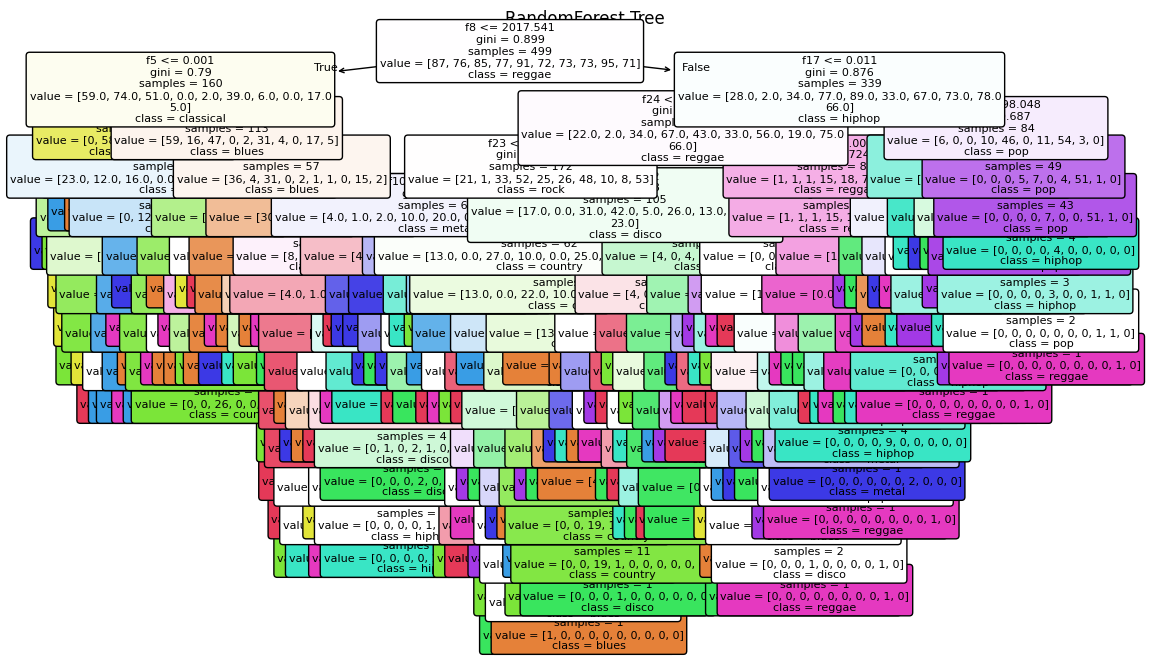

In [19]:
from sklearn.tree import plot_tree

estimator = model.estimators_[0]

plt.figure(figsize=(12, 8))
plot_tree(estimator,
          feature_names=[f"f{i}" for i in range(x_train.shape[1])],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("RandomForest Tree ")
plt.show()

More briefly and shorter:

[Text(0.45689655172413796, 0.9, 'f8 <= 2017.541\ngini = 0.899\nsamples = 499\nvalue = [87, 76, 85, 77, 91, 72, 73, 73, 95, 71]\nclass = reggae'),
 Text(0.1896551724137931, 0.7, 'f5 <= 0.001\ngini = 0.79\nsamples = 160\nvalue = [59.0, 74.0, 51.0, 0.0, 2.0, 39.0, 6.0, 0.0, 17.0\n5.0]\nclass = classical'),
 Text(0.3232758620689655, 0.8, 'True  '),
 Text(0.06896551724137931, 0.5, 'f0 <= 1.5\ngini = 0.335\nsamples = 47\nvalue = [0, 58, 4, 0, 0, 8, 2, 0, 0, 0]\nclass = classical'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 39\nvalue = [0, 58, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = classical'),
 Text(0.10344827586206896, 0.3, 'f58 <= 75.335\ngini = 0.571\nsamples = 8\nvalue = [0, 0, 4, 0, 0, 8, 2, 0, 0, 0]\nclass = jazz'),
 Text(0.06896551724137931, 0.1, '\n  (...)  \n'),
 Text(0.13793103448275862, 0.1, '\n  (...)  \n'),
 Text(0.3103448275862069, 0.5, 'f36 <= 91.488\ngini = 0.779\nsamples = 113\nvalue = [59, 16, 47, 0, 2, 31, 4, 0, 17, 5]\nclass = blues'),
 Text(0.2413793103448276, 0.

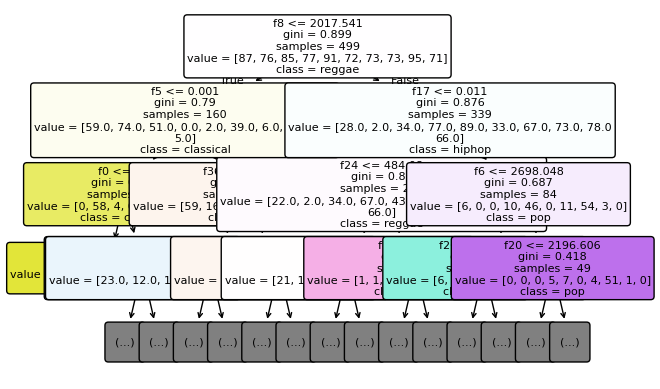

In [20]:
plot_tree(estimator,
          feature_names=[f"f{i}" for i in range(x_train.shape[1])],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)